In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import init_notebook_mode
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')
sns.set_palette('pastel')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv')

df.drop(columns=['student_id'], axis=1, inplace=True)

print(df.shape)
df.head()

(1000, 15)


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.4980,2.308100,17.0,18.750,20.0,23.000,24.0
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
mental_health_rating,1000.0,5.4380,2.847501,1.0,3.000,5.0,8.000,10.0
exam_score,1000.0,69.6015,16.888564,18.4,58.475,70.5,81.325,100.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
gender,1000,3,Female,481
part_time_job,1000,2,No,785
diet_quality,1000,3,Fair,437
parental_education_level,909,3,High School,392
internet_quality,1000,3,Good,447
extracurricular_participation,1000,2,No,682


In [7]:
df.isnull().sum()

age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

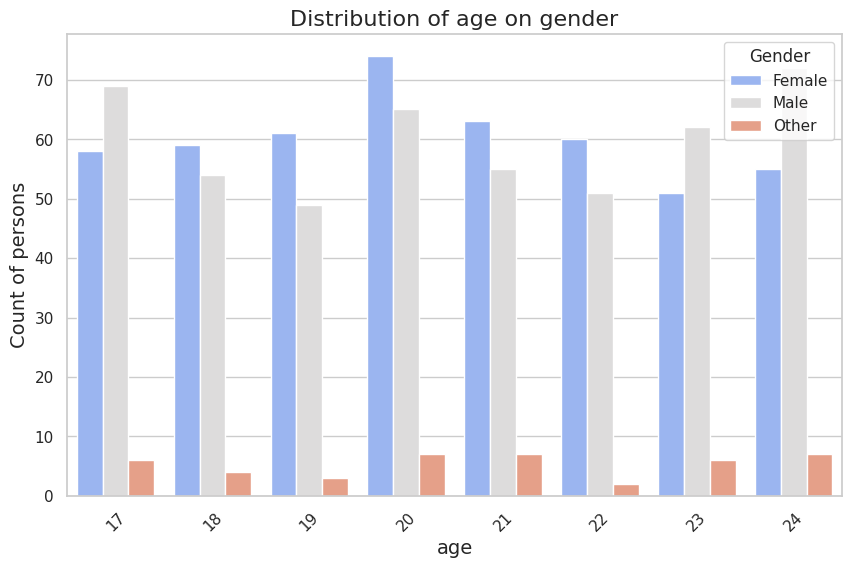

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['age'], 
              hue=df['gender'], 
              palette='coolwarm'
             )
plt.title('Distribution of age on gender', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count of persons', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender');

In [9]:
df = df[(df['gender'] == 'Male') | (df['gender'] == 'Female')]

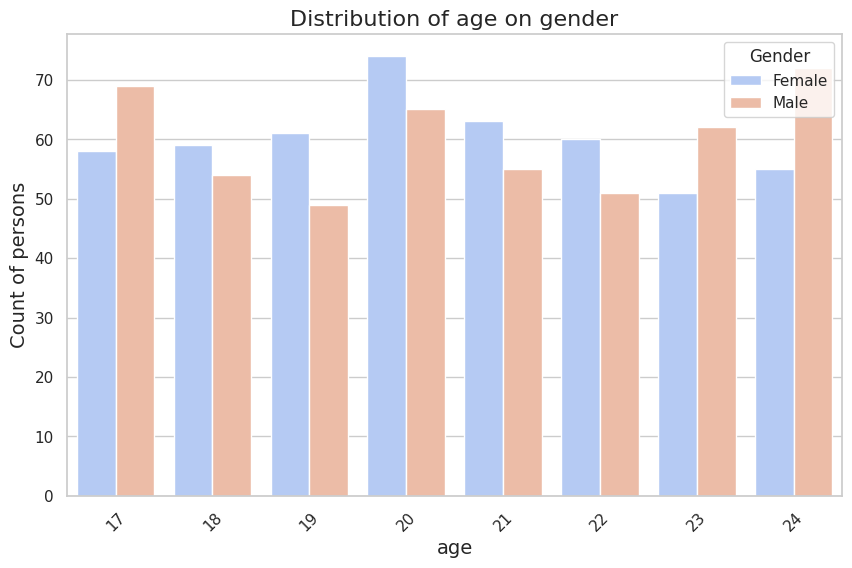

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['age'], 
              hue=df['gender'], 
              palette='coolwarm'
             )
plt.title('Distribution of age on gender', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count of persons', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender');

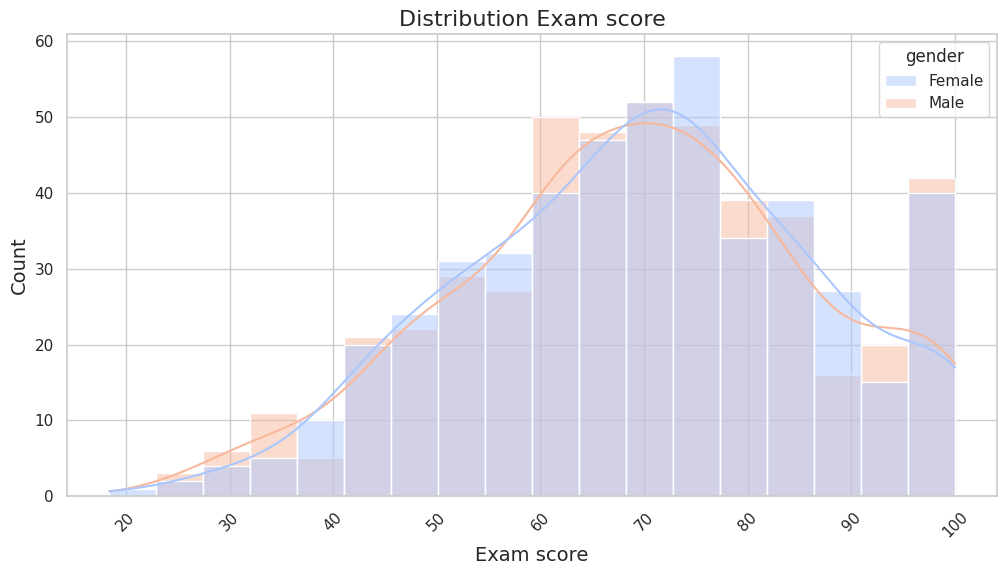

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, 
             x='exam_score', 
             hue='gender', 
             kde=True, 
             palette='coolwarm'
            )
plt.title('Distribution Exam score', fontsize=16)
plt.xlabel('Exam score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45);

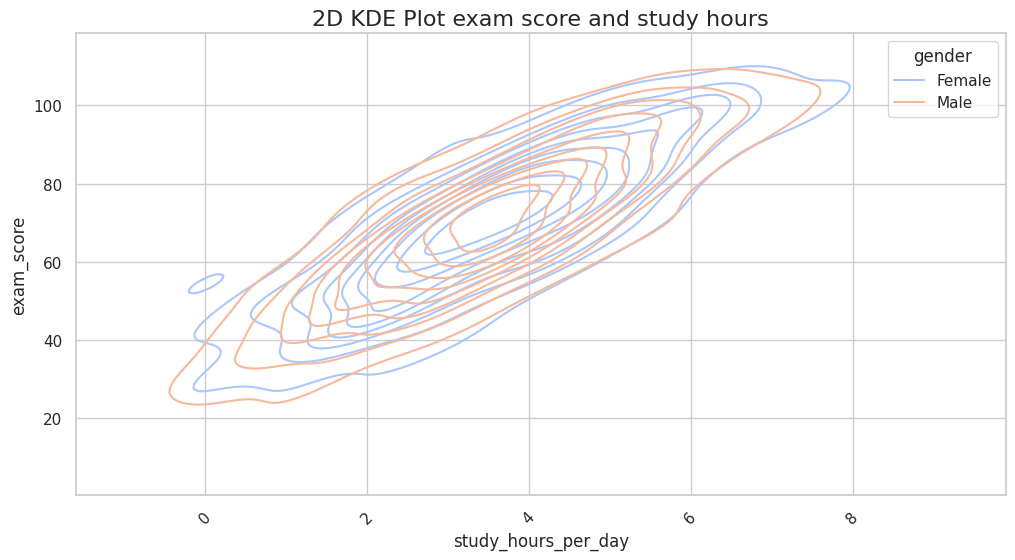

In [12]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, 
            x='study_hours_per_day', 
            y='exam_score', 
            hue='gender', 
            palette='coolwarm',
           )
plt.title('2D KDE Plot exam score and study hours', fontsize=16)
plt.xticks(rotation=45);

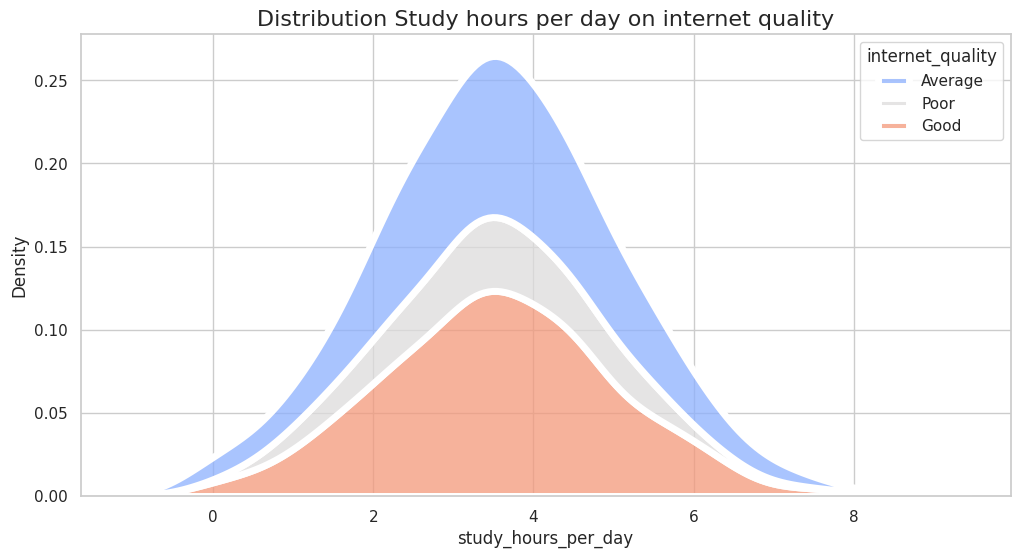

In [13]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, 
            x='study_hours_per_day', 
            hue='internet_quality', 
            multiple='stack', 
            linewidth=5, 
            palette='coolwarm'
           );
plt.title('Distribution Study hours per day on internet quality', fontsize=16);

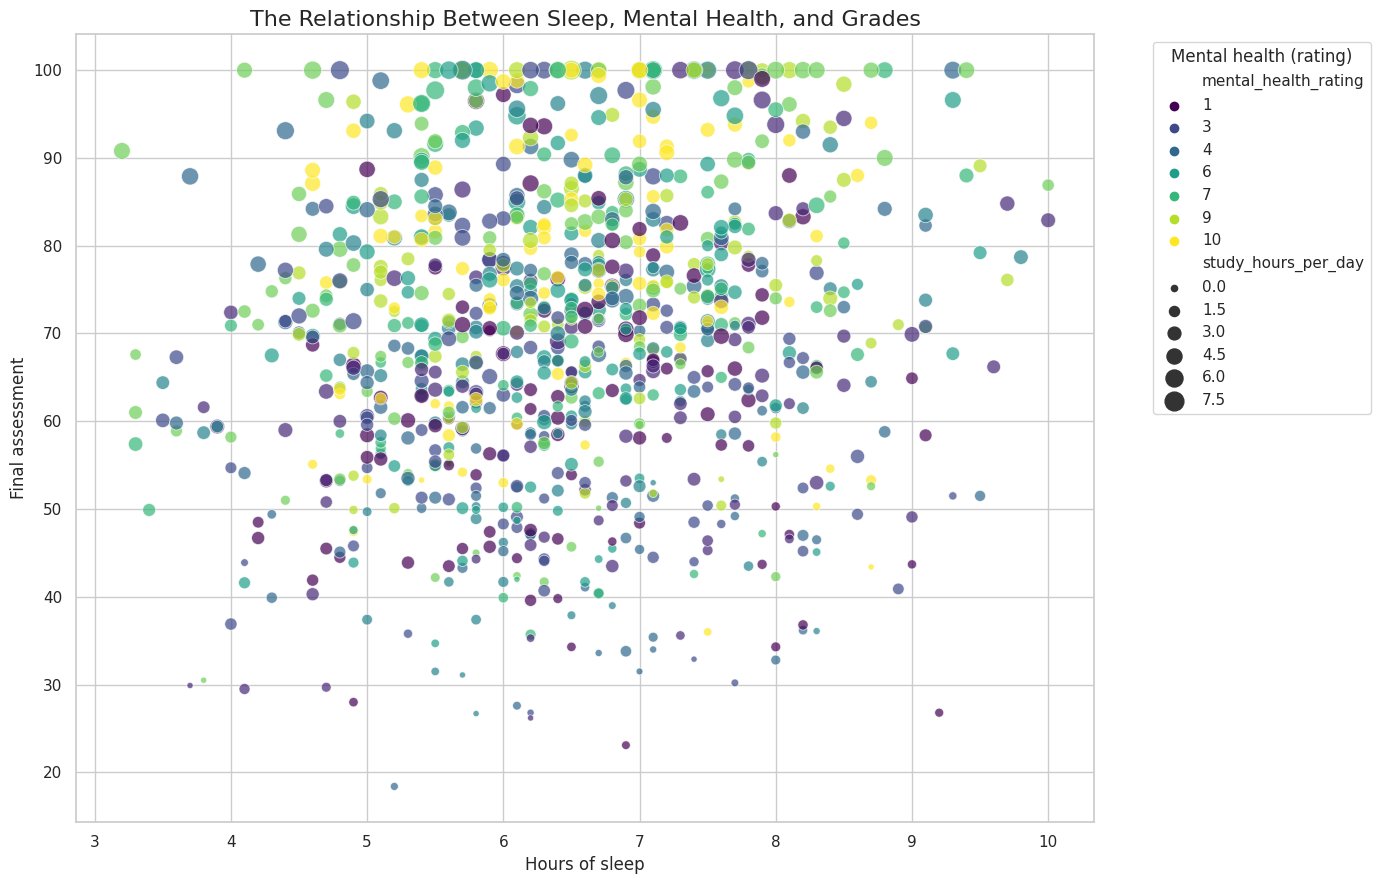

In [35]:
plt.figure(figsize=(14, 9))
sns.scatterplot(
    data=df,
    x='sleep_hours',
    y='exam_score',
    hue='mental_health_rating', 
    size='study_hours_per_day',
    palette='viridis',
    alpha=0.7,
    sizes=(20, 200) 
)
plt.title('The Relationship Between Sleep, Mental Health, and Grades', fontsize=16)
plt.xlabel('Hours of sleep', fontsize=12)
plt.ylabel('Final assessment', fontsize=12)
plt.legend(title='Mental health (rating)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout();

In [15]:
df['diet_quality'] = df['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})

df['internet_quality'] = df['internet_quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

df['parental_education_level'] = df['parental_education_level'].map({'High School': 0, 'Bachelor': 1, 'Master': 2})

### Hypothesis: Study Hours Positively Impact Exam Scores

**Null Hypothesis (H₀):**  
There is no significant correlation between daily study hours and exam scores (ρ = 0).

**Alternative Hypothesis (H₁):**  
There is a significant positive correlation between daily study hours and exam scores (ρ > 0).

#### Key Findings:

1. Strong Positive Correlation (r = 0.826):

      * Indicates a very strong positive relationship (Cohen's guideline: |r| > 0.5 = large effect)
    
      * Effect size is substantial and practically significant

2. Statistical Significance (p < 0.0001):

      * Extremely strong evidence to reject the null hypothesis
    
      * Probability this correlation occurred by chance: < 0.01%
  
---

Correlation of studies and exam scores:
Pearson correlation coefficient: 0.826, p-value: 0.0000


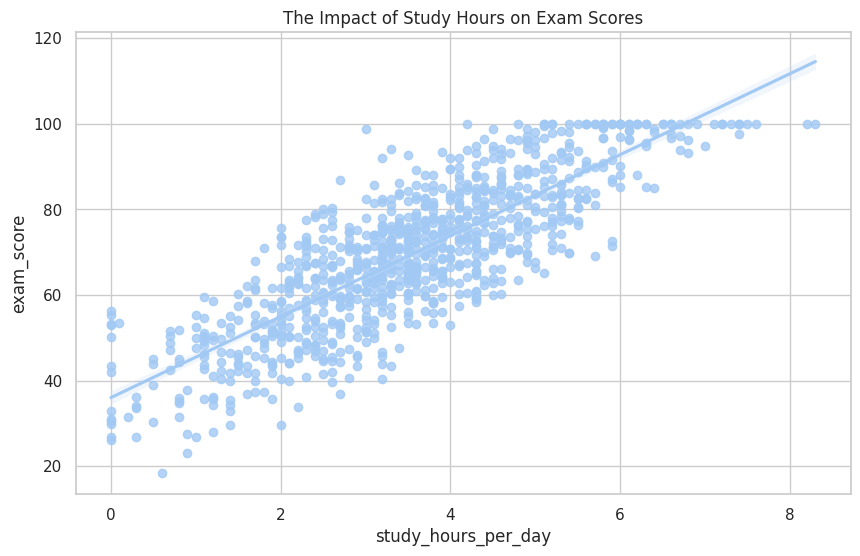

In [16]:
print("="*50)
print("Correlation of studies and exam scores:")
corr, p_value = stats.pearsonr(df['study_hours_per_day'], df['exam_score'])
print(f"Pearson correlation coefficient: {corr:.3f}, p-value: {p_value:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('The Impact of Study Hours on Exam Scores');

### Hypothesis : Social Media and Netflix Negatively Impact Academic Performance

**Null Hypothesis (H₀):**  
Hours spent on social media (β₁ = 0) and Netflix (β₂ = 0) have no significant relationship with exam scores.

**Alternative Hypothesis (H₁):**  
Increased hours on social media (β₁ < 0) and Netflix (β₂ < 0) negatively impact exam scores.

#### Key Findings:

1. Significant Negative Effects:

      * Social Media: Each additional hour reduces exam scores by 2.39 points (p < 0.001)
    
      * Netflix: Each additional hour reduces exam scores by 2.58 points (p < 0.001)

2. Effect Magnitude Comparison:

      * Netflix has slightly stronger negative impact than social media
    
      * Combined effect: 1 hour social media + 1 hour Netflix ≈ 5-point score reduction
  
---

In [17]:
print("\n" + "="*50)
print("The Impact of Social Media and Netflix on Academic Performance:")
model = ols('exam_score ~ social_media_hours + netflix_hours', data=df).fit()
print(model.summary())


The Impact of Social Media and Netflix on Academic Performance:
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     26.60
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           5.72e-12
Time:                        18:25:15   Log-Likelihood:                -4048.1
No. Observations:                 958   AIC:                             8102.
Df Residuals:                     955   BIC:                             8117.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### Hypothesis: Extracurricular Participation Improves Academic Performance

**Null Hypothesis (H₀):**  
There is no significant difference in exam scores between students who participate in extracurricular activities and those who do not (μ₁ = μ₂).

**Alternative Hypothesis (H₁):**  
Students who participate in extracurricular activities have higher exam scores than those who do not (μ₁ > μ₂).

#### Key Findings:
1. Non-Significant Difference:

    * Extremely small t-statistic (0.083) indicates minimal difference between groups
    
    * High p-value (0.934) >> 0.05 significance threshold

2. Practical Equivalence:

    * Participation group average: 69.6%
    
    * Non-participation group average: 69.5%
    
    * Mere 0.1 percentage point difference
  
---

In [18]:
print("\n" + "="*50)
print("Impact of extracurricular activities:")

yes_scores = df[df['extracurricular_participation'] == 'Yes']['exam_score']
no_scores = df[df['extracurricular_participation'] == 'No']['exam_score']

t_stat, p_val = stats.ttest_ind(yes_scores, no_scores, nan_policy='omit')

print(f"T-statistics: {t_stat:.3f}, p-value: {p_val:.4f}")
print(f"Average score (participation): {yes_scores.mean():.1f}, Without participation: {no_scores.mean():.1f}")


Impact of extracurricular activities:
T-statistics: 0.083, p-value: 0.9338
Average score (participation): 69.6, Without participation: 69.5


### Hypothesis 4: Gender Differences in Social Media Usage

**Null Hypothesis (H₀):**  
There is no significant difference in daily social media usage between male and female students (μ_male = μ_female).

**Alternative Hypothesis (H₁):**  
Male and female students differ significantly in their daily social media usage (μ_male ≠ μ_female).

#### Key Findings:

1. No Significant Difference:

    * Near-zero t-statistic (-0.060) indicates virtually identical group means
    
    * Extremely high p-value (0.952) >> 0.05 significance threshold

2. Practical Equivalence:

    * Male average: 2.5 hours/day
    
    * Female average: 2.5 hours/day
    
    * Difference: 0.0 hours
  
---

In [19]:
print("\n" + "="*50)
print("Gender differences in social networks:")

male_social = df[df['gender'] == 'Male']['social_media_hours']
female_social = df[df['gender'] == 'Female']['social_media_hours']

t_stat, p_val = stats.ttest_ind(male_social, female_social, nan_policy='omit')

print(f"T-statistics: {t_stat:.3f}, p-value: {p_val:.4f}")
print(f"Men: {male_social.mean():.1f} h/day, Women: {female_social.mean():.1f} h/day")


Gender differences in social networks:
T-statistics: -0.060, p-value: 0.9518
Men: 2.5 h/day, Women: 2.5 h/day


In [20]:
print("\n" + "="*50)
print("The Impact of Sleep on Mental Health:")

corr, p_value = stats.spearmanr(df['sleep_hours'], df['mental_health_rating'], nan_policy='omit')

print(f"Spearman Correlation: {corr:.3f}, p-value: {p_value:.4f}")


The Impact of Sleep on Mental Health:
Spearman Correlation: -0.007, p-value: 0.8239


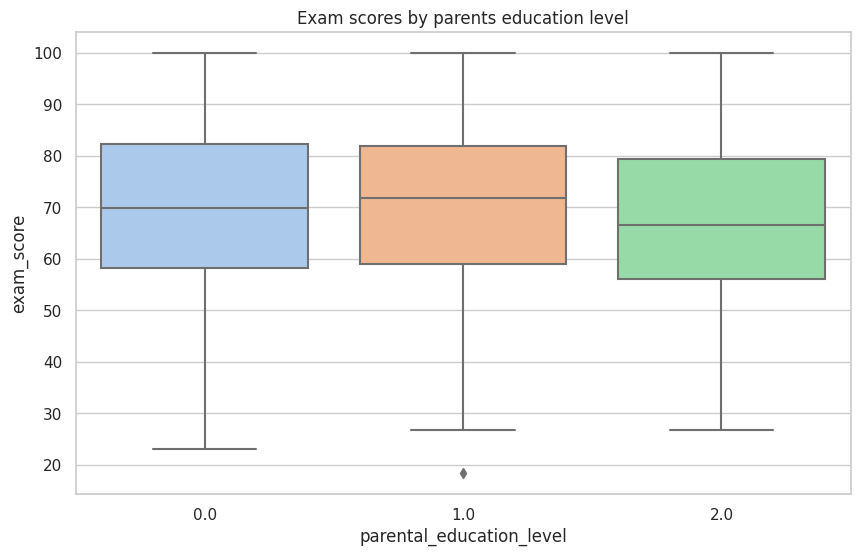

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_education_level', 
            y='exam_score', 
            data=df)
plt.title('Exam scores by parents education level');

In [22]:
# ANOVA test
model = ols('exam_score ~ C(parental_education_level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                    sum_sq     df         F    PR(>F)
C(parental_education_level)     810.256883    2.0  1.396179  0.248095
Residual                     252447.444721  870.0       NaN       NaN


In [23]:
print("\n" + "="*50)
print("Impact of part-time work on attendance:")

job_attendance = df[df['part_time_job'] == 'Yes']['attendance_percentage']
nojob_attendance = df[df['part_time_job'] == 'No']['attendance_percentage']

t_stat, p_val = stats.ttest_ind(job_attendance, nojob_attendance, nan_policy='omit')

print(f"T-statistics: {t_stat:.3f}, p-value: {p_val:.4f}")
print(f"With part-time work: {job_attendance.mean():.1f}%, Without part-time work: {nojob_attendance.mean():.1f}%")


Impact of part-time work on attendance:
T-statistics: -1.528, p-value: 0.1269
With part-time work: 83.2%, Without part-time work: 84.4%


In [24]:
print("\n" + "="*50)
print("Multiple regression for exam scores:")
model = ols('''exam_score ~ study_hours_per_day + attendance_percentage + 
              sleep_hours + C(diet_quality) + social_media_hours''', data=df).fit()
print(model.summary())


Multiple regression for exam scores:
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     459.6
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          5.99e-277
Time:                        18:25:20   Log-Likelihood:                -3422.2
No. Observations:                 958   AIC:                             6858.
Df Residuals:                     951   BIC:                             6892.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

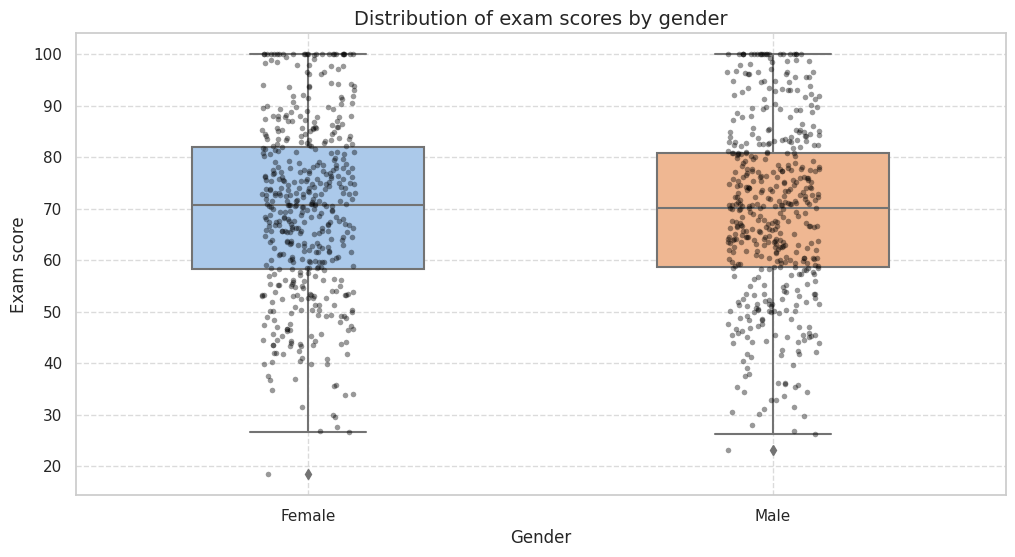

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, 
            x='gender', 
            y='exam_score', 
            width=0.5,
           )
sns.stripplot(data=df, 
              x='gender', 
              y='exam_score', 
              color='black', 
              alpha=0.4, 
              size=4,
             )
plt.title('Distribution of exam scores by gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7);

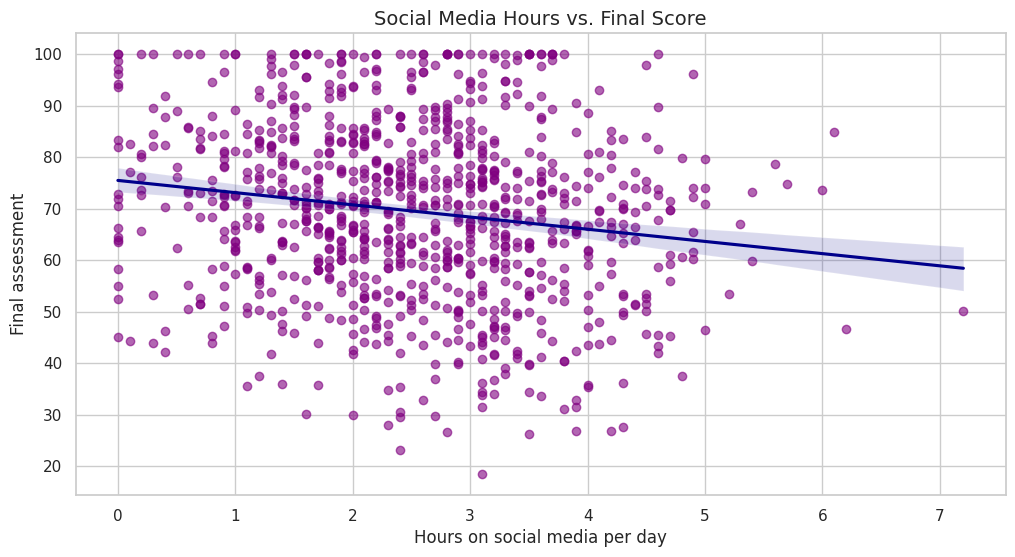

In [30]:
plt.figure(figsize=(12,6))
sns.regplot(data=df, 
            x='social_media_hours', 
            y='exam_score',
            scatter_kws={'alpha':0.6, 'color': 'purple'}, 
            line_kws={'color': 'darkblue'},
           )
plt.title('Social Media Hours vs. Final Score', fontsize=14)
plt.xlabel('Hours on social media per day')
plt.ylabel('Final assessment');

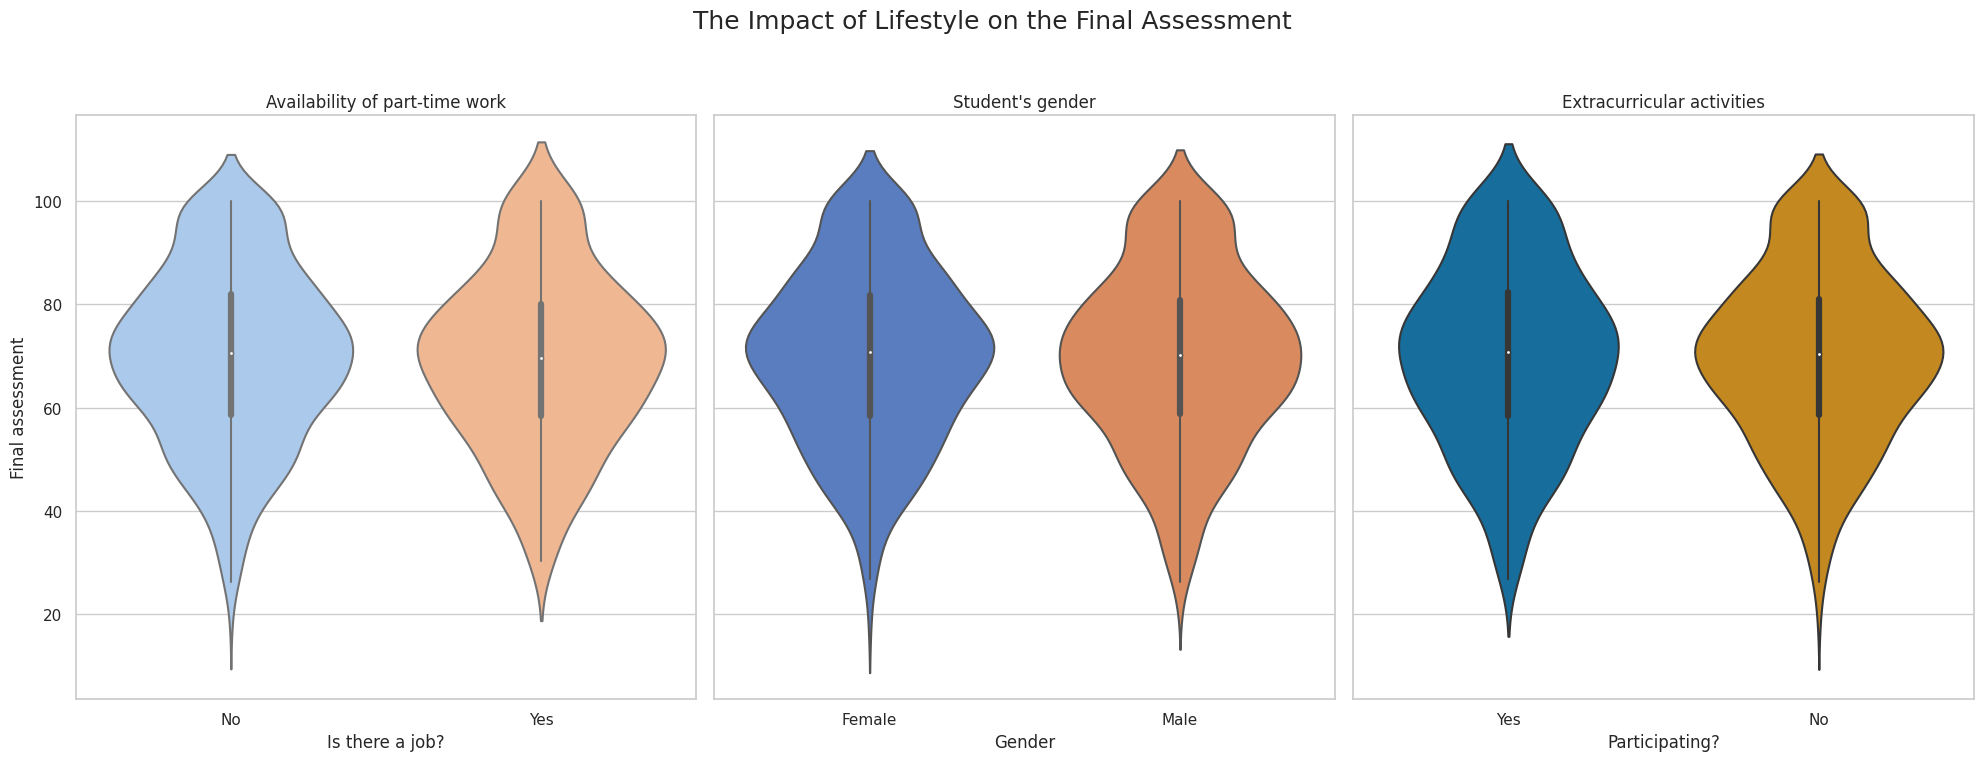

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('The Impact of Lifestyle on the Final Assessment', fontsize=18)

sns.violinplot(data=df, 
               ax=axes[0], 
               x='part_time_job', 
               y='exam_score',
               palette='pastel',
              )
axes[0].set_title('Availability of part-time work')
axes[0].set_xlabel('Is there a job?')
axes[0].set_ylabel('Final assessment')

sns.violinplot(data=df, 
               ax=axes[1], 
               x='gender', 
               y='exam_score', 
               palette='muted',
              )
axes[1].set_title('Student\'s gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('')

sns.violinplot(data=df, 
               ax=axes[2], 
               x='extracurricular_participation', 
               y='exam_score', 
               palette='colorblind',
              )
axes[2].set_title('Extracurricular activities')
axes[2].set_xlabel('Participating?')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

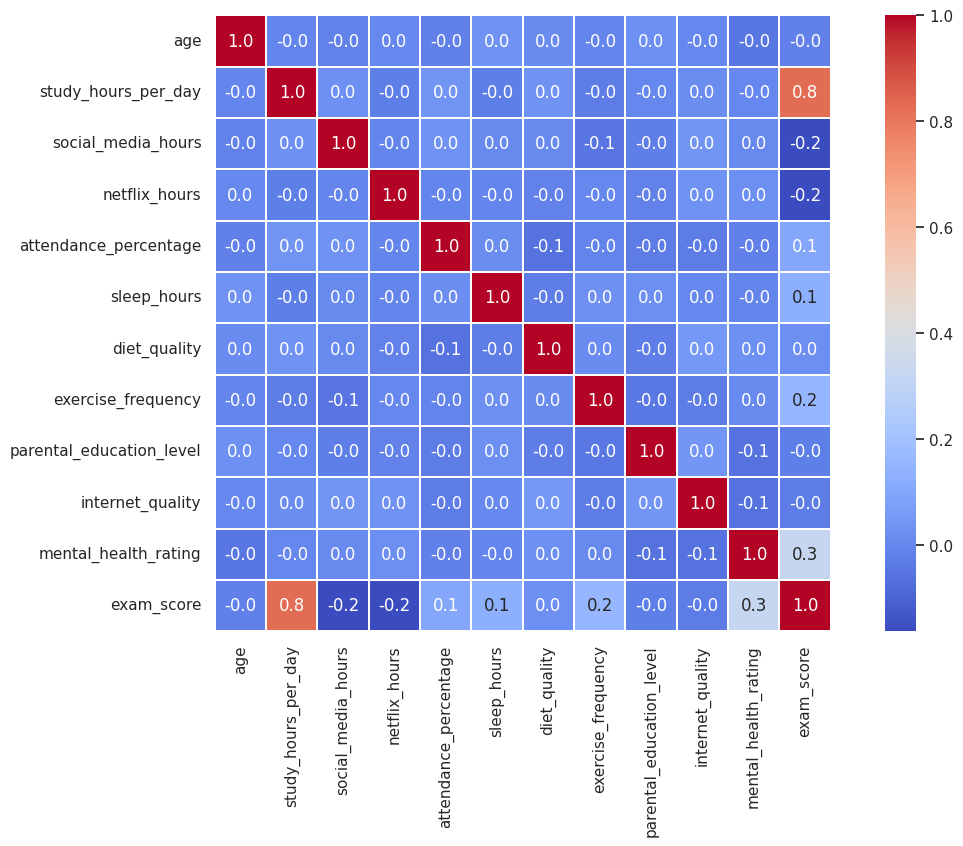

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

In [38]:
df_engineered = df.copy()

In [39]:
df_engineered['total_screen_time'] = df_engineered['social_media_hours'] + df_engineered['netflix_hours']

df_engineered['study_to_distraction_ratio'] = df_engineered['study_hours_per_day'] / (df_engineered['total_screen_time'] + 0.1)


df_engineered['gender'] = df_engineered['gender'].map({'Male': 1, 'Female': 0})
df_engineered['part_time_job'] = df_engineered['part_time_job'].map({'Yes': 1, 'No': 0})
df_engineered['extracurricular_participation'] = df_engineered['extracurricular_participation'].map({'Yes': 1, 'No': 0})

df_engineered.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_screen_time,study_to_distraction_ratio
0,23,0,0.0,1.2,1.1,0,85.0,8.0,1,6,2.0,1,8,1,56.2,2.3,0.000000
1,20,0,6.9,2.8,2.3,0,97.3,4.6,2,6,0.0,1,8,0,100.0,5.1,1.326923
2,21,1,1.4,3.1,1.3,0,94.8,8.0,0,1,0.0,0,1,0,34.3,4.4,0.311111
3,23,0,1.0,3.9,1.0,0,71.0,9.2,0,4,2.0,2,1,1,26.8,4.9,0.200000
4,19,0,5.0,4.4,0.5,0,90.9,4.9,1,3,2.0,2,1,0,66.4,4.9,1.000000


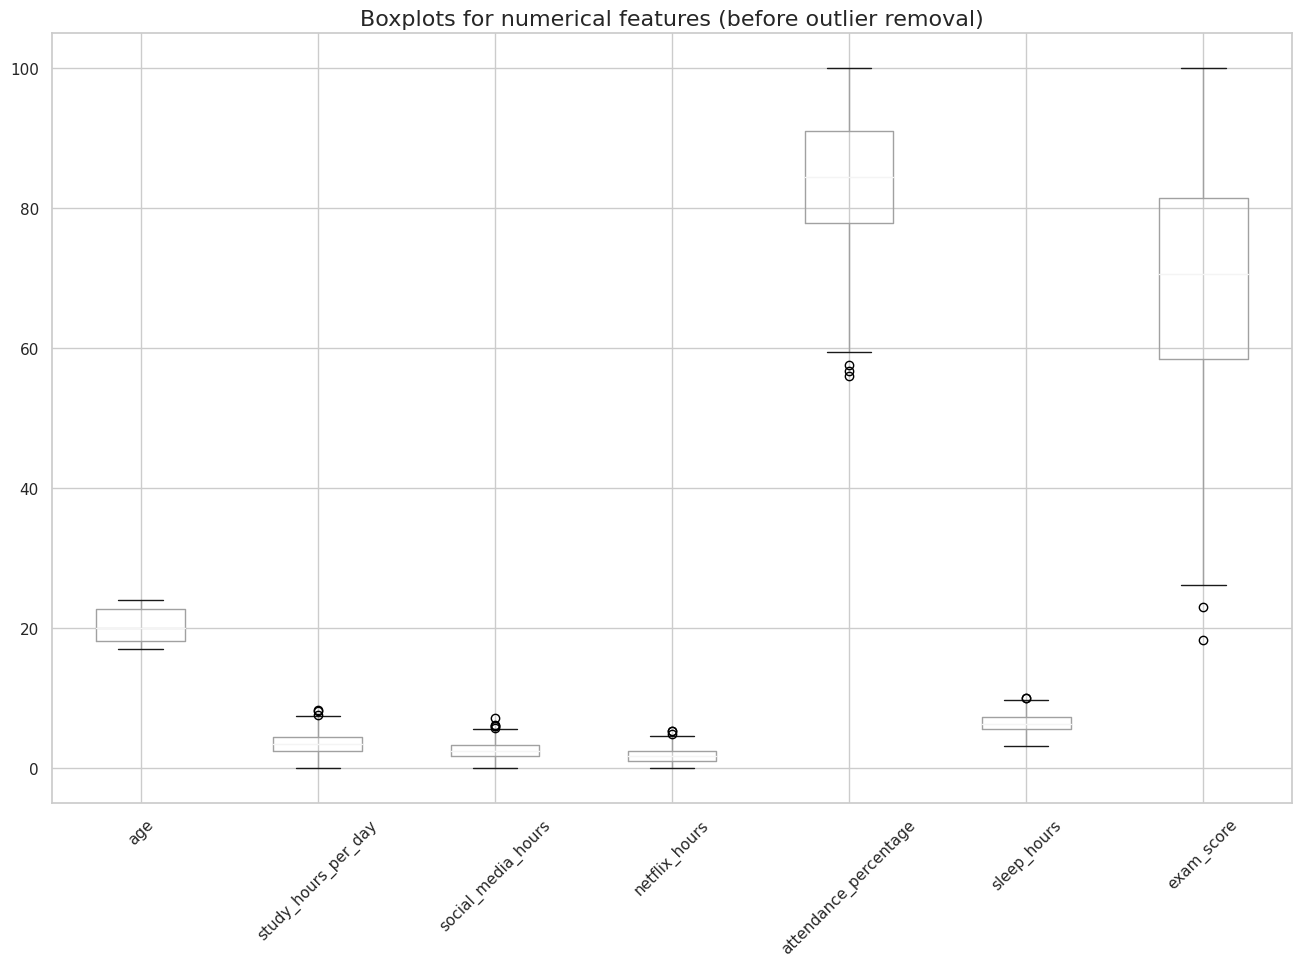

In [43]:
numerical_cols_for_outliers = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exam_score'
]

plt.figure(figsize=(16, 10))
df_engineered[numerical_cols_for_outliers].boxplot()
plt.title('Boxplots for numerical features (before outlier removal)', fontsize=16)
plt.xticks(rotation=45);

In [44]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

In [45]:
initial_rows = len(df_engineered)

for col in numerical_cols_for_outliers:
    df_cleaned = handle_outliers(df_engineered, col)

final_rows = len(df_cleaned)
removed_rows = initial_rows - final_rows

print("\n--- The process of removing emissions is complete ---")
print(f"Initial dataset size: {initial_rows} строк")
print(f"Final dataset size: {final_rows} строк")
print(f"Removed rows with outliers: {removed_rows} ({removed_rows / initial_rows:.2%})")


--- The process of removing emissions is complete ---
Initial dataset size: 958 строк
Final dataset size: 958 строк
Removed rows with outliers: 0 (0.00%)


In [56]:
print("NaN values per column after feature engineering:")
print(X.isnull().sum().sort_values(ascending=False).head())

NaN values per column after feature engineering:
parental_education_level    85
age                          0
gender                       0
study_hours_per_day          0
social_media_hours           0
dtype: int64


In [76]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import xgboost as xgb
import catboost as cb
import time

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [77]:
X = df_cleaned.drop('exam_score', axis=1)
y = df_cleaned['exam_score']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (766, 16)
Test set size: (192, 16)


In [79]:
def objective(trial, model_name, X, y):
    match model_name:
        case 'LinearRegression':
            params = {}
            regressor = LinearRegression()
        case 'SVR':
            params = {'regressor__C': trial.suggest_float('regressor__C', 1e-1, 1e2, log=True), 'regressor__gamma': trial.suggest_float('regressor__gamma', 1e-3, 1e-1, log=True)}
            regressor = SVR(kernel='rbf')
        case 'ElasticNet':
            params = {'regressor__alpha': trial.suggest_float('regressor__alpha', 1e-3, 10.0, log=True), 'regressor__l1_ratio': trial.suggest_float('regressor__l1_ratio', 0.1, 1.0)}
            regressor = ElasticNet(random_state=42)
        case 'RandomForest':
            params = {'regressor__n_estimators': trial.suggest_int('regressor__n_estimators', 100, 1000), 'regressor__max_depth': trial.suggest_int('regressor__max_depth', 3, 20)}
            regressor = RandomForestRegressor(random_state=42, n_jobs=-1)
        case 'GradientBoosting':
            params = {'regressor__n_estimators': trial.suggest_int('regressor__n_estimators', 100, 1000), 'regressor__learning_rate': trial.suggest_float('regressor__learning_rate', 0.01, 0.3)}
            regressor = GradientBoostingRegressor(random_state=42)
        case 'XGBoost':
            params = {'regressor__n_estimators': trial.suggest_int('regressor__n_estimators', 100, 1500), 'regressor__learning_rate': trial.suggest_float('regressor__learning_rate', 0.01, 0.3)}
            regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
        case 'CatBoost':
            params = {'regressor__iterations': trial.suggest_int('regressor__iterations', 100, 1500), 'regressor__learning_rate': trial.suggest_float('regressor__learning_rate', 0.01, 0.2)}
            regressor = cb.CatBoostRegressor(random_state=42, verbose=0)
        case _:
            raise ValueError(f"Unknown model name: {model_name}")

    full_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('regressor', regressor)
    ])
    
    full_pipeline.set_params(**params)
    
    score = cross_val_score(full_pipeline, X, y, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
    return -np.mean(score)

In [80]:
models_to_tune = [
    'LinearRegression', 'ElasticNet', 'SVR', 'RandomForest', 'GradientBoosting', 'XGBoost', 'CatBoost'
]

best_params = {}
studies = {}

print("\n--- Starting hyperparameter tuning for 7 models (with imputation) ---")

for model_name in models_to_tune:
    start_time = time.time()
    
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, model_name, X_train, y_train), n_trials=30)
    
    duration = time.time() - start_time
    
    best_params[model_name] = study.best_params
    studies[model_name] = study
    
    print(f"Model: {model_name:<16} | Best RMSE (CV): {study.best_value:.4f} | Time: {duration:.1f} sec.")


--- Starting hyperparameter tuning for 7 models (with imputation) ---
Model: LinearRegression | Best RMSE (CV): 5.4905 | Time: 3.9 sec.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+03, tolerance: 1.508e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.035e+02, tolerance: 1.496e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.089e+02, tolerance: 1.496e

Model: ElasticNet       | Best RMSE (CV): 5.4453 | Time: 1.3 sec.
Model: SVR              | Best RMSE (CV): 5.5947 | Time: 2.5 sec.
Model: RandomForest     | Best RMSE (CV): 6.4782 | Time: 122.9 sec.
Model: GradientBoosting | Best RMSE (CV): 6.0342 | Time: 26.1 sec.
Model: XGBoost          | Best RMSE (CV): 6.4696 | Time: 32.6 sec.
Model: CatBoost         | Best RMSE (CV): 5.7450 | Time: 136.0 sec.


In [81]:
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(np.maximum(y_pred, 0)) - np.log1p(y_true), 2)))

In [82]:
all_trained_models = {}
results = []

print("\n--- Final training, model evaluation and visualization ---")

for model_name, params in best_params.items():
    match model_name:
        case 'LinearRegression': regressor = LinearRegression()
        case 'SVR': regressor = SVR(kernel='rbf')
        case 'ElasticNet': regressor = ElasticNet(random_state=42)
        case 'RandomForest': regressor = RandomForestRegressor(random_state=42, n_jobs=-1)
        case 'GradientBoosting': regressor = GradientBoostingRegressor(random_state=42)
        case 'XGBoost': regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
        case 'CatBoost': regressor = cb.CatBoostRegressor(random_state=42, verbose=0)
        case _: continue
    
    pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler()), ('regressor', regressor)])
    pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    
    all_trained_models[model_name] = pipeline 
    
    y_pred = pipeline.predict(X_test)
    results.append({
        'Model': model_name,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'RMSLE': rmsle(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values('RMSE').reset_index(drop=True)
print("\n--- Results of model evaluation on test data ---")
print(results_df.to_string())


--- Final training, model evaluation and visualization ---

--- Results of model evaluation on test data ---
              Model      RMSE     RMSLE  R2 Score
0  LinearRegression  5.070346  0.082562  0.906576
1        ElasticNet  5.083689  0.082920  0.906083
2               SVR  5.169080  0.084999  0.902902
3          CatBoost  5.207159  0.086449  0.901466
4  GradientBoosting  5.692571  0.093582  0.882239
5           XGBoost  5.793867  0.093611  0.878011
6      RandomForest  5.933060  0.099172  0.872079


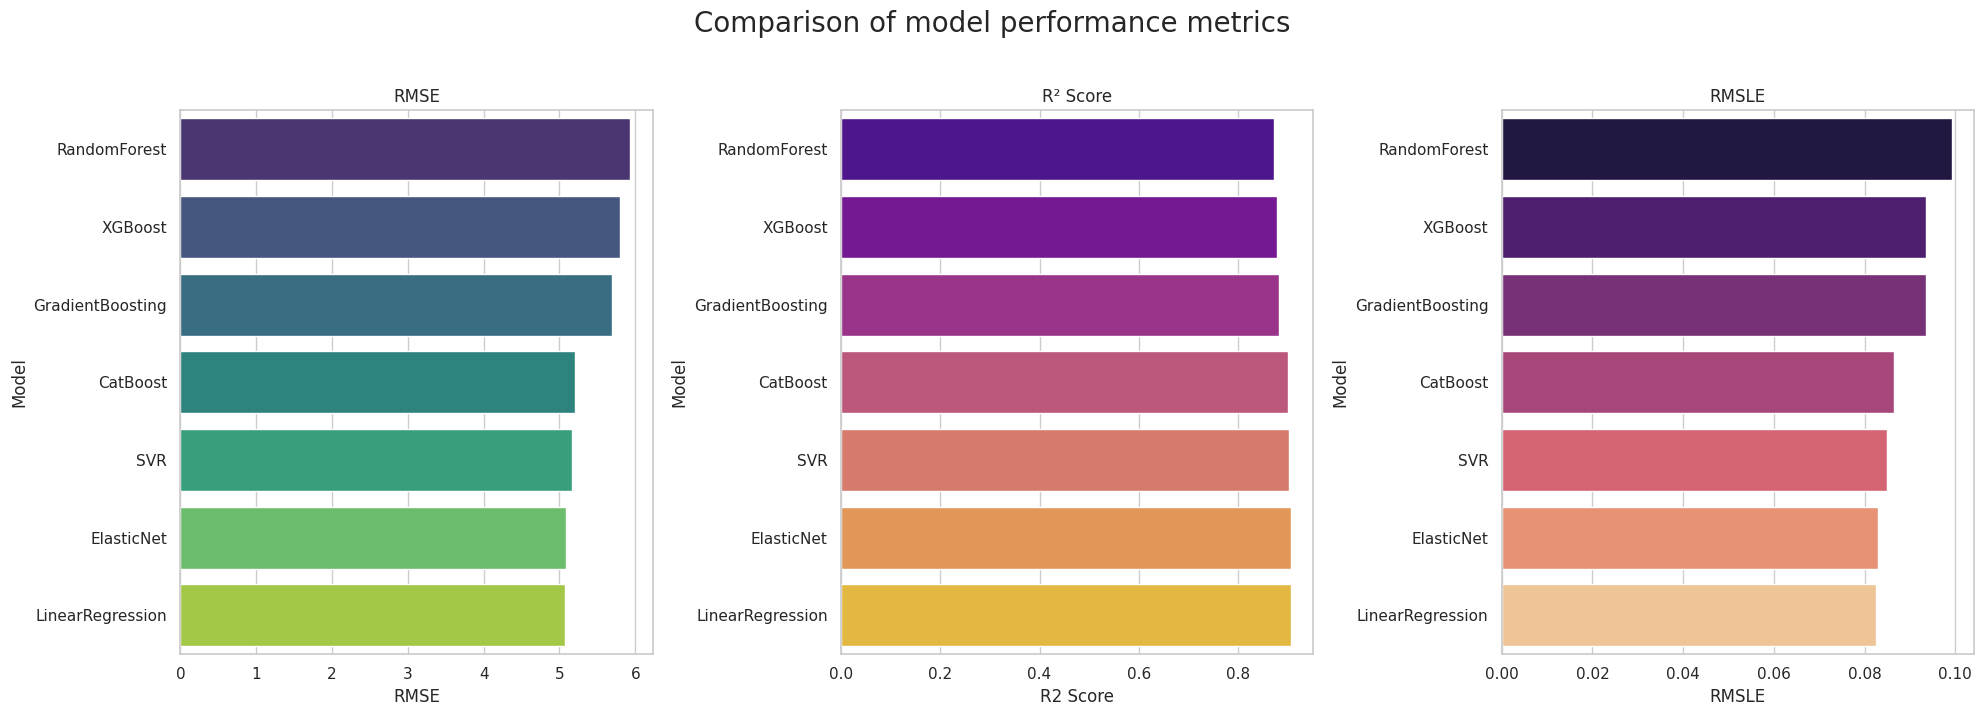

In [83]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Comparison of model performance metrics', fontsize=20, y=1.02)

sns.barplot(x='RMSE', y='Model', data=results_df.sort_values('RMSE', ascending=False), ax=axes[0], palette='viridis')
axes[0].set_title('RMSE')

sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values('R2 Score'), ax=axes[1], palette='plasma')
axes[1].set_title('R² Score')

sns.barplot(x='RMSLE', y='Model', data=results_df.sort_values('RMSLE', ascending=False), ax=axes[2], palette='magma')
axes[2].set_title('RMSLE')

plt.tight_layout();


Rendering results for the best model: LinearRegression


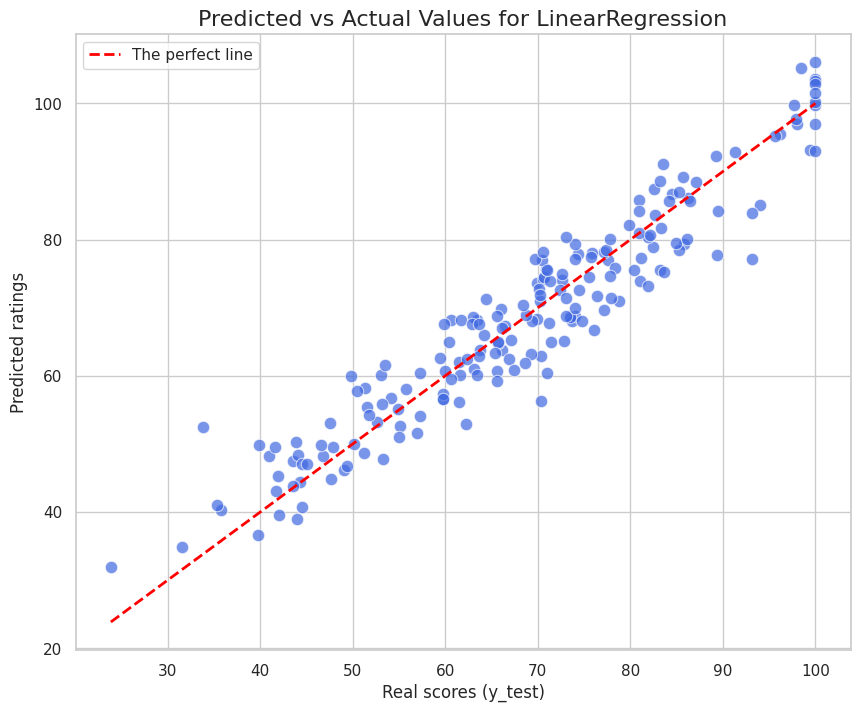

In [84]:
best_model_name = results_df.iloc[0]['Model']
best_model_pipeline = all_trained_models[best_model_name]
best_predictions = best_model_pipeline.predict(X_test)

print(f"\nRendering results for the best model: {best_model_name}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=best_predictions, alpha=0.7, color='royalblue', s=80, edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2, label='The perfect line')
plt.title(f'Predicted vs Actual Values ​​for {best_model_name}', fontsize=16)
plt.xlabel('Real scores (y_test)', fontsize=12)
plt.ylabel('Predicted ratings', fontsize=12)
plt.legend()
plt.grid(True);

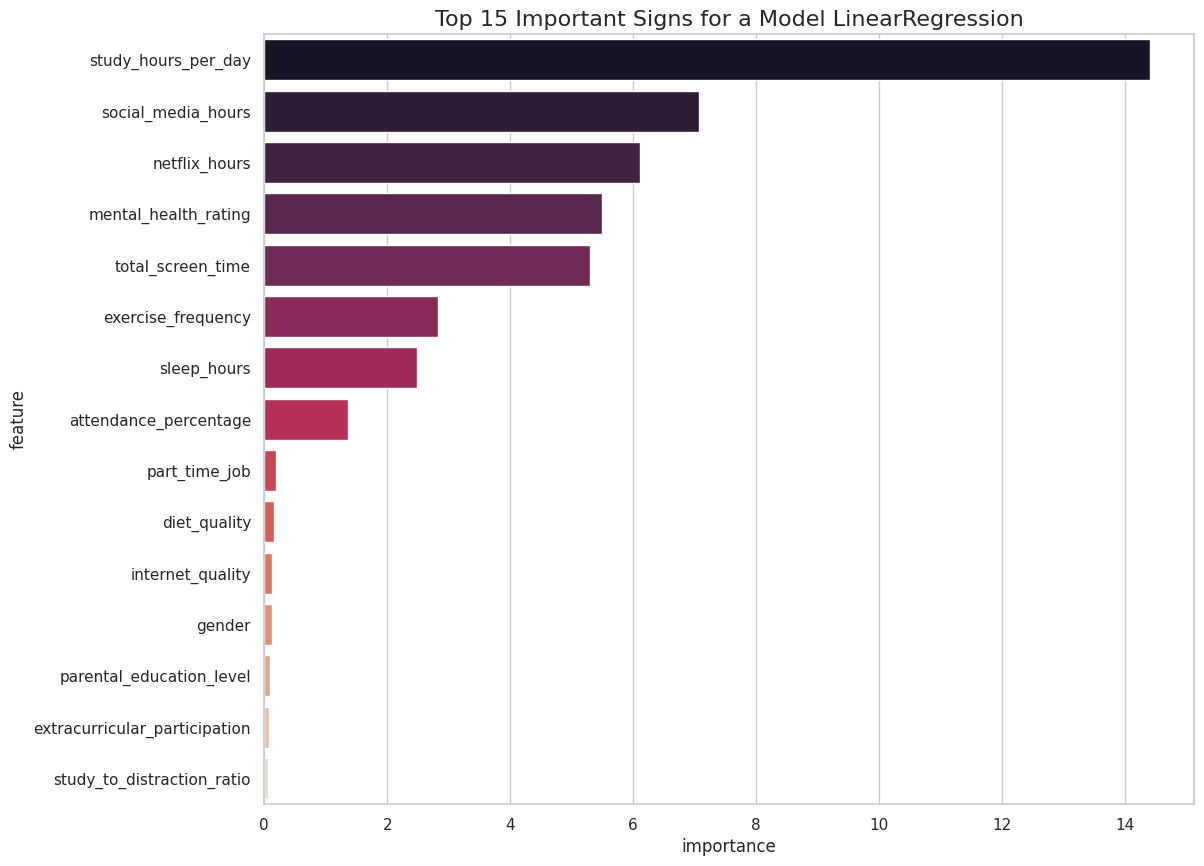

In [85]:
final_estimator = best_model_pipeline.named_steps['regressor']

if hasattr(final_estimator, 'feature_importances_'):
    importances = final_estimator.feature_importances_
elif hasattr(final_estimator, 'coef_'):
    importances = np.abs(final_estimator.coef_)
else:
    importances = None

if importances is not None:
    feature_importances_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=feature_importances_df.head(15), palette='rocket')
    plt.title(f'Top 15 Important Signs for a Model {best_model_name}', fontsize=16)
    plt.show()
else:
    print(f"\nFor model {best_model_name} feature importance is not available")
